## Imports & read file

In [12]:
import pm4py
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.objects.conversion.bpmn import converter as bpmn_to_petri
from pm4py.objects.conversion.log import converter as log_converter



# read XES file
log = pm4py.read_xes("./BPI Challenge 2017_1_all/BPI Challenge 2017.xes")
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

## Data preprocessing

In [13]:
case_col = "case:concept:name"
act_col = "concept:name"

final_decision = ["A_Pending", "A_Cancelled", "A_Denied"]
cases_complete = df[df[act_col].isin(final_decision)][case_col].unique()
df_filtered = df[df[case_col].isin(cases_complete)]

print(f"Original cases: {df[case_col].nunique()}")
print(f"Filtered cases: {df_filtered[case_col].nunique()}")
print(f"Removed cases: {df[case_col].nunique() - df_filtered[case_col].nunique()}")

Original cases: 31509
Filtered cases: 31411
Removed cases: 98


# Alpha Miner

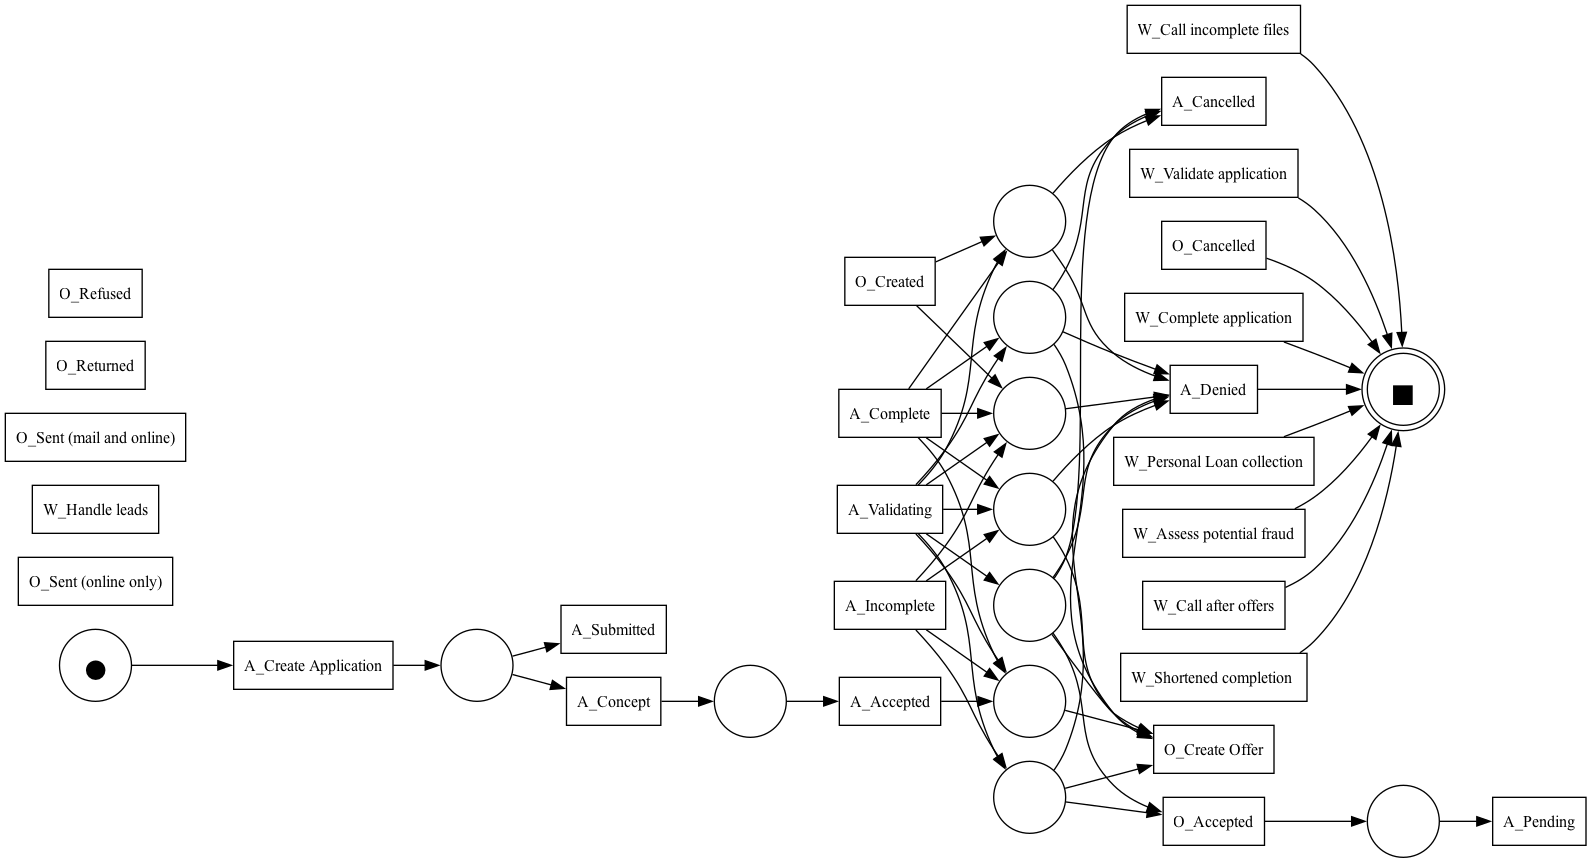

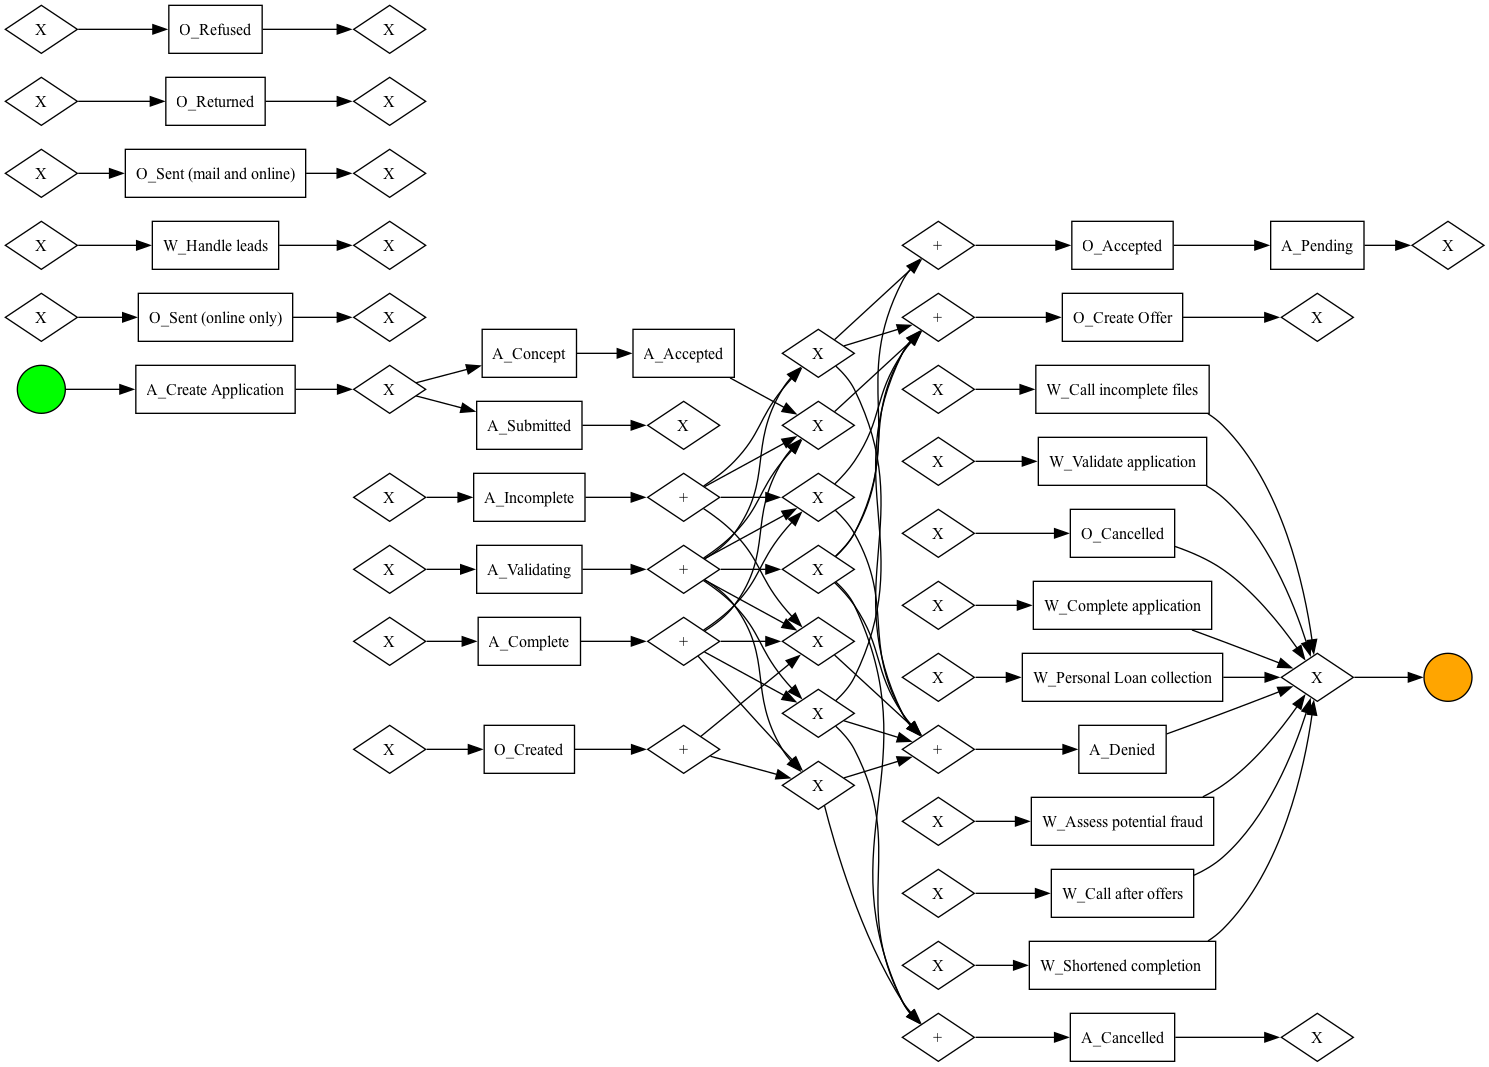

In [15]:
# ___________ ALPHA MINER ____________
net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(df_filtered)

# Visualize the discovered Petri net
pm4py.view_petri_net(net_alpha, im_alpha, fm_alpha)

# Convert Petri net to BPMN
bpmn_graph_alpha = pm4py.convert_to_bpmn(net_alpha, im_alpha, fm_alpha)

# Visualize BPMN
pm4py.view_bpmn(bpmn_graph_alpha)

In [6]:
print("=== QUALITY METRICS: Alpha Miner ===")

fitness_alpha = pm4py.fitness_alignments(df_filtered, net_alpha, im_alpha, fm_alpha, multi_processing=True)
print("Fitness (trace):", round(fitness_alpha["average_trace_fitness"], 3))

precision_alpha = pm4py.precision_alignments(df_filtered, net_alpha, im_alpha, fm_alpha, multi_processing=True)
print("Precision:", round(precision_alpha, 3))

generalization_alpha = generalization_evaluator.apply(df_filtered, net_alpha, im_alpha, fm_alpha)
print("Generalization:", round(generalization_alpha, 3))

simplicity_alpha = simplicity_evaluator.apply(net_alpha)
print("Simplicity:", round(simplicity_alpha, 3))

=== QUALITY METRICS: Alpha Miner ===


aligning log, completed variants ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 0.242


computing precision with alignments, completed variants ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.09


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.982
Simplicity: 0.576


# Inductive Miner

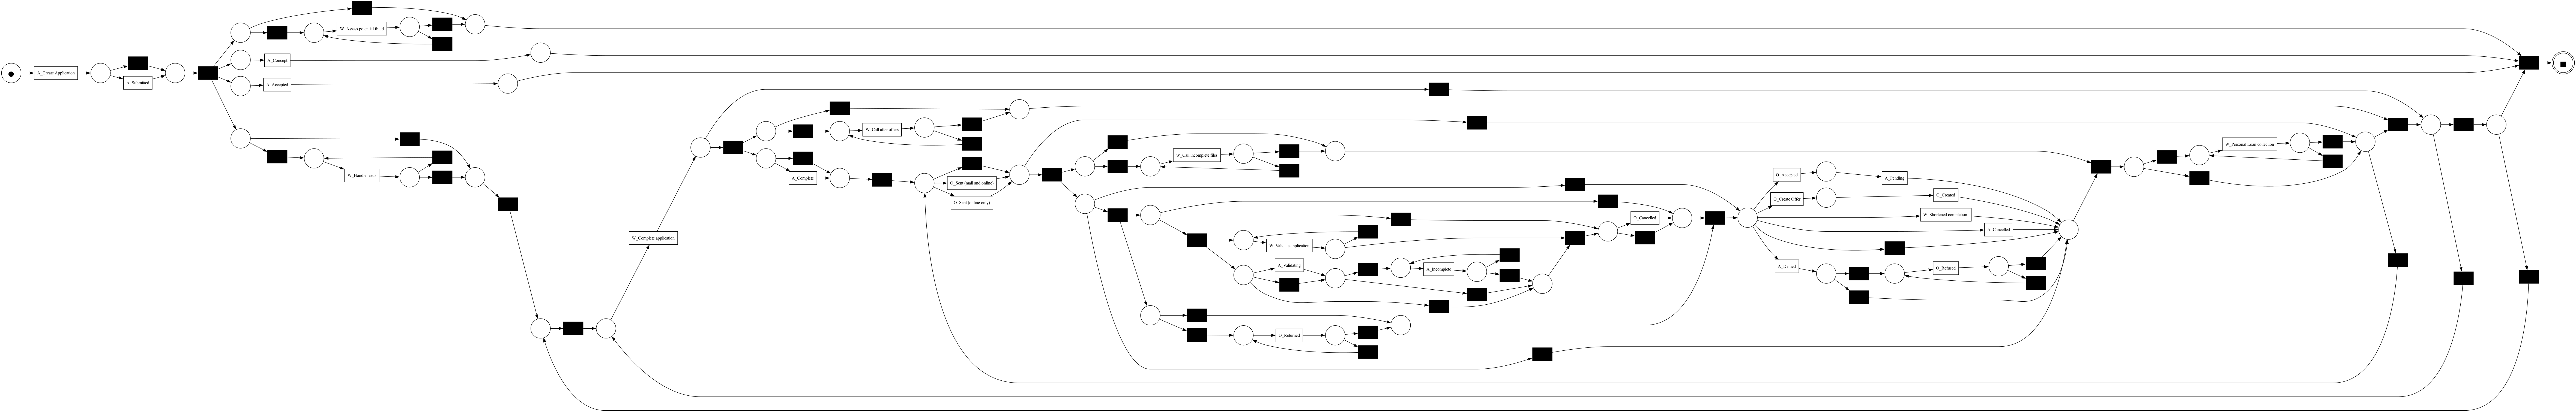

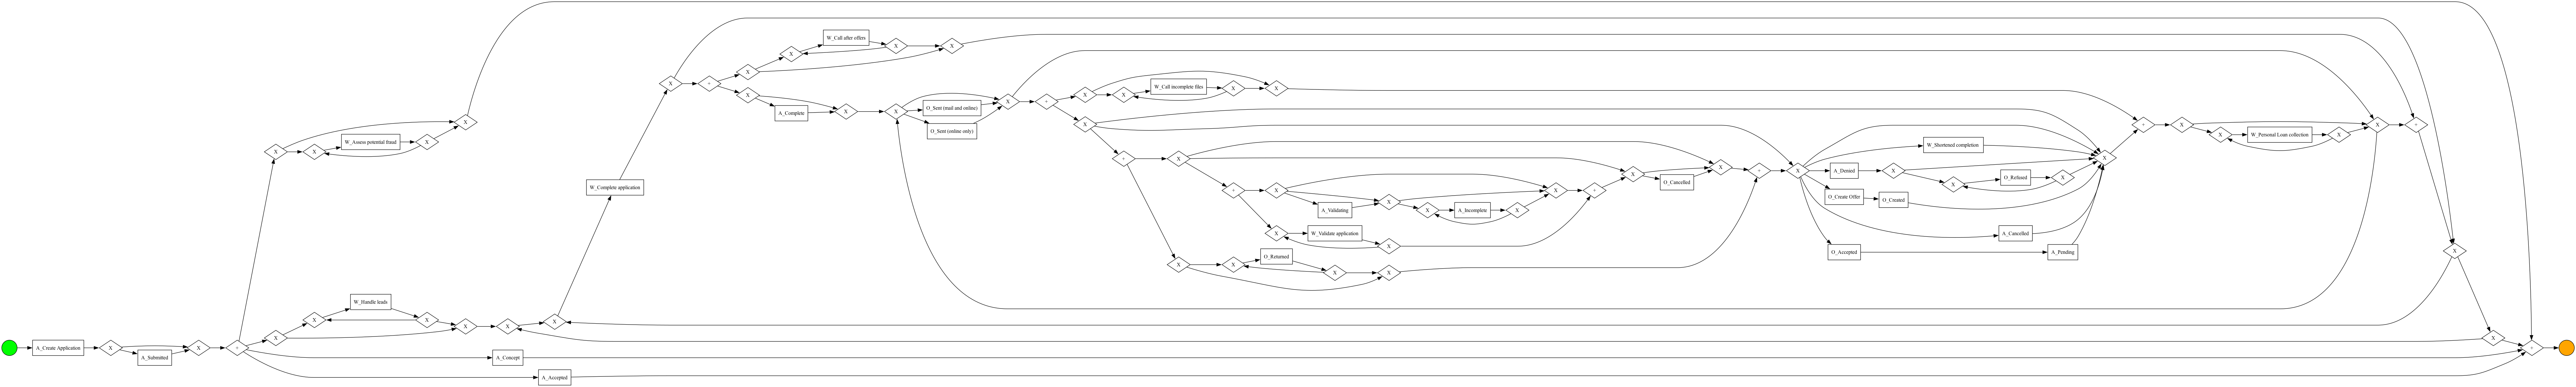

In [16]:
# ___________ INDUCTIVE MINER ____________
net_ind, im_ind, fm_ind = pm4py.discover_petri_net_inductive(df_filtered)

# visualize the discovered Petri net
pm4py.view_petri_net(net_ind, im_ind, fm_ind)

# Convert Petri net to BPMN
bpmn_graph_ind = pm4py.convert_to_bpmn(net_ind, im_ind, fm_ind)

# Visualize BPMN
pm4py.view_bpmn(bpmn_graph_ind)

In [ ]:
print("=== QUALITY METRICS: Inductive Miner ===")

fitness_ind = pm4py.fitness_alignments(df_filtered, net_ind, im_ind, fm_ind, multi_processing=True)
print("Fitness (trace):", round(fitness_ind["average_trace_fitness"], 3))

precision_ind = pm4py.precision_alignments(df_filtered, net_ind, im_ind, fm_ind, multi_processing=True)
print("Precision:", round(precision_ind, 3))

generalization_ind = generalization_evaluator.apply(df_filtered, net_ind, im_ind, fm_ind)
print("Generalization:", round(generalization_ind, 3))

simplicity_ind = simplicity_evaluator.apply(net_ind)
print("Simplicity:", round(simplicity_ind, 3))

=== QUALITY METRICS: Inductive Miner ===


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 1.0


replaying log with TBR, completed traces ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.16


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.94
Simplicity: 0.627


# Heuristics Miner

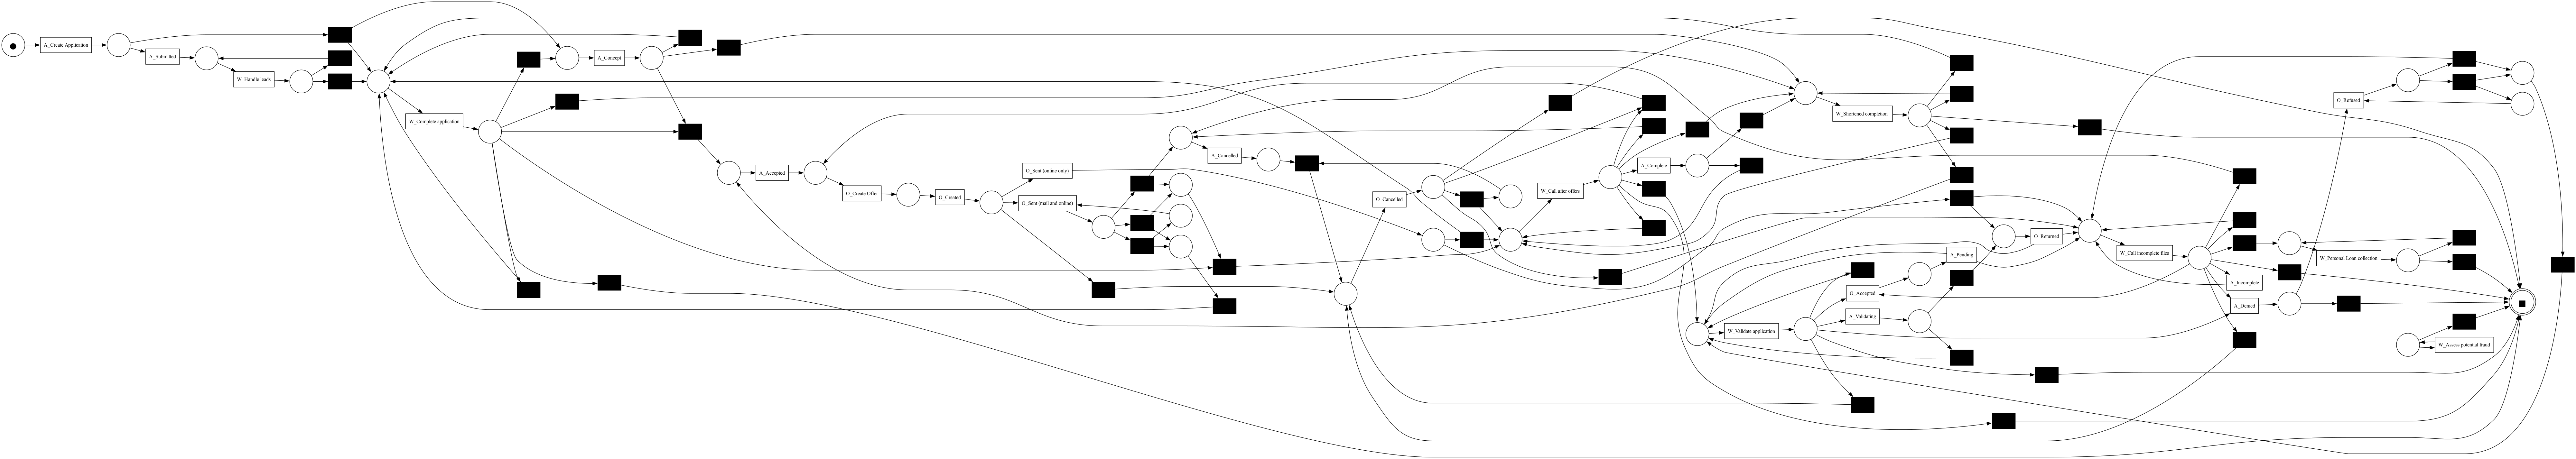

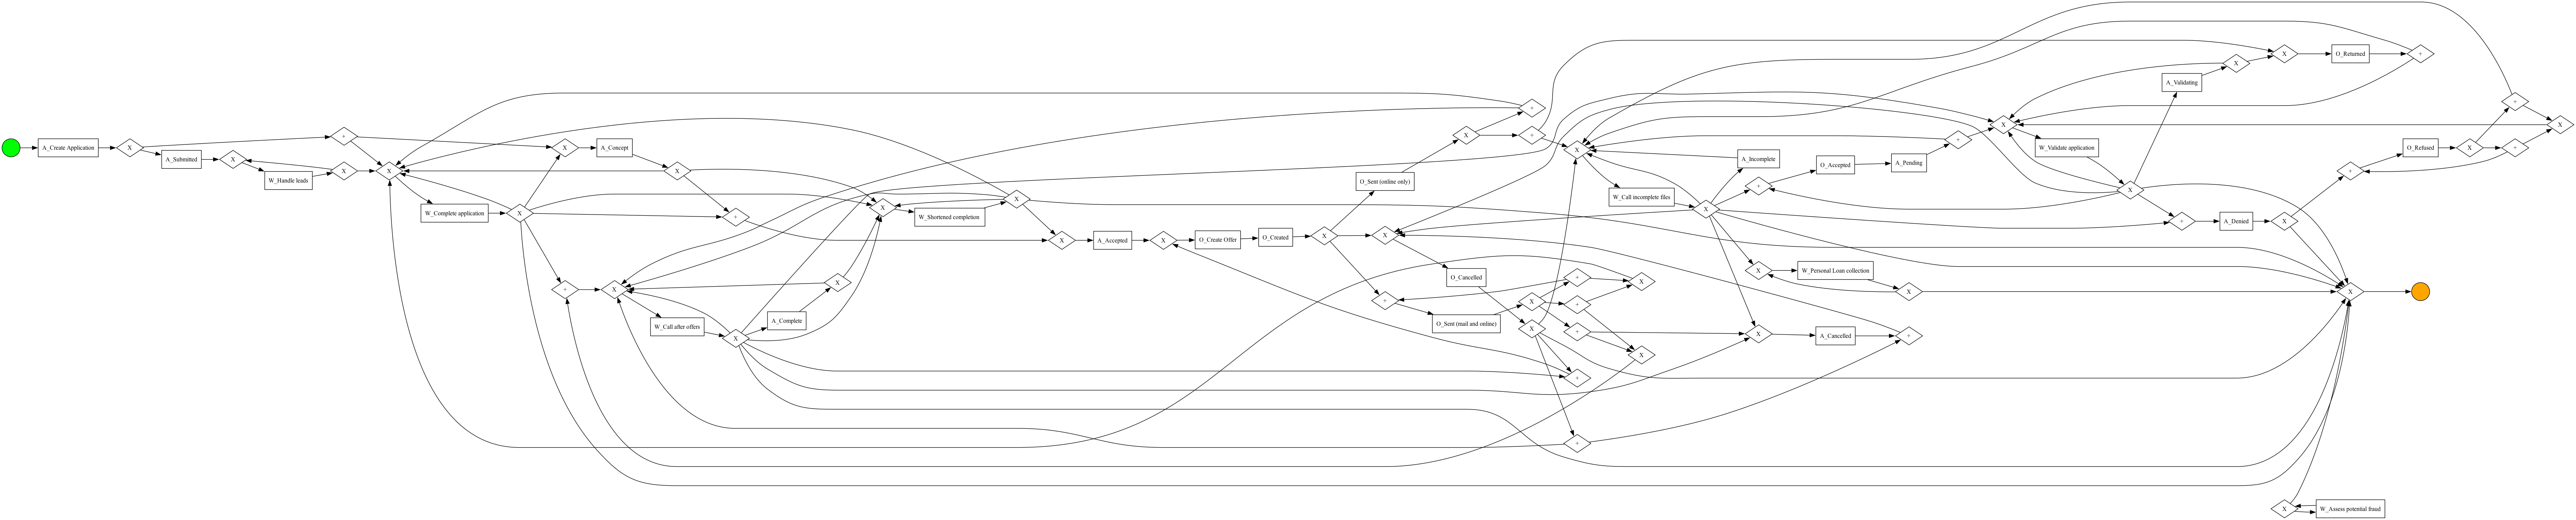

In [17]:
# ___________ HEURISTICS MINER ____________
net_heur, im_heur, fm_heur = pm4py.discover_petri_net_heuristics(df_filtered)

# visualize the discovered Petri net
pm4py.view_petri_net(net_heur, im_heur, fm_heur)

# Convert Petri net to BPMN
bpmn_graph_heur = pm4py.convert_to_bpmn(net_heur, im_heur, fm_heur)

# Visualize BPMN
pm4py.view_bpmn(bpmn_graph_heur)

In [24]:
print("=== QUALITY METRICS: Heuristics Miner ===")

fitness_heur = pm4py.fitness_token_based_replay(df_filtered, net_heur, im_heur, fm_heur)
print("Fitness (trace):", round(fitness_heur["average_trace_fitness"], 3))

precision_heur = pm4py.precision_token_based_replay(df_filtered, net_heur, im_heur, fm_heur)
print("Precision:", round(precision_heur, 3))

generalization_heur = generalization_evaluator.apply(df_filtered, net_heur, im_heur, fm_heur)
print("Generalization:", round(generalization_heur, 3))

simplicity_heur = simplicity_evaluator.apply(net_heur)
print("Simplicity:", round(simplicity_heur, 3))


=== QUALITY METRICS: Heuristics Miner ===


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 0.947


replaying log with TBR, completed traces ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.671


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.93
Simplicity: 0.522


# Refined base Model

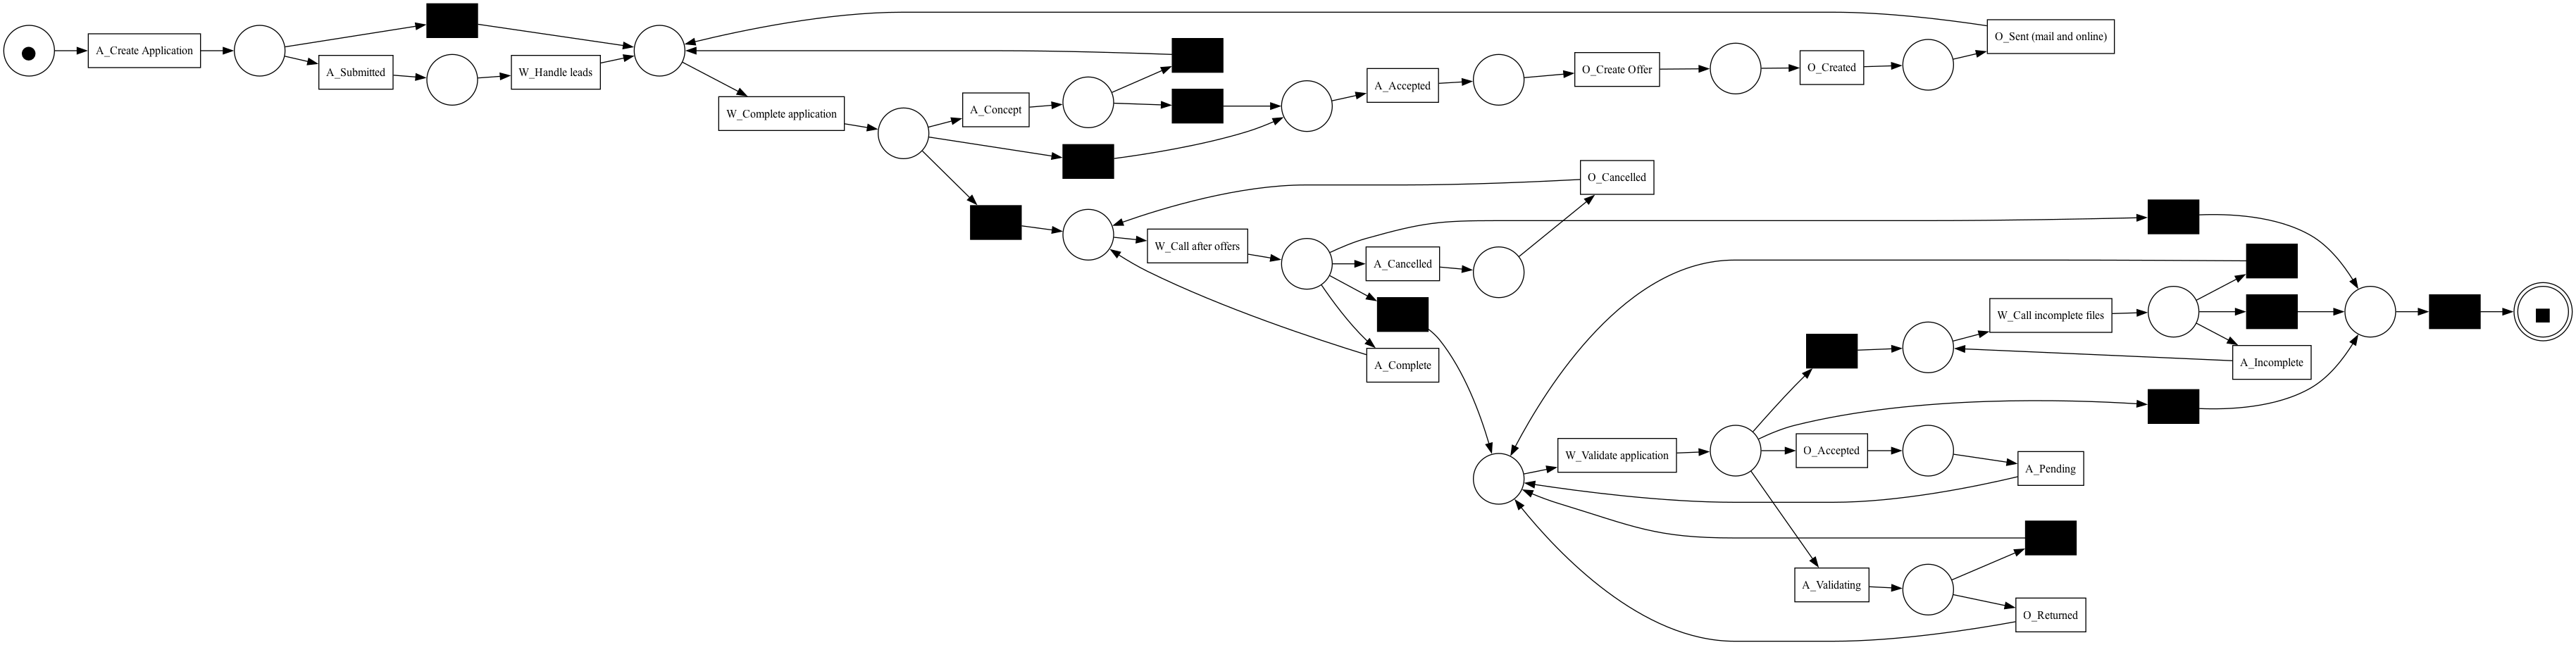

In [18]:
# ___________ FINAL MODEL ____________
bpmn_model = bpmn_importer.apply("./final_Model/refined_base_model_figure_3.bpmn")

net_base, im_base, fm_base = bpmn_to_petri.apply(bpmn_model)

# Visualize the discovered Petri net
pm4py.view_petri_net(net_base, im_base, fm_base)

In [9]:
print("=== QUALITY METRICS: Refined Base Model ===")

fitness_final = pm4py.fitness_alignments(df_filtered, net_base, im_base, fm_base, multi_processing=True)
print("Fitness (trace):", round(fitness_final["average_trace_fitness"], 3))

precision_final = pm4py.precision_alignments(df_filtered, net_base, im_base, fm_base, multi_processing=True)
print("Precision:", round(precision_final, 3))

generalization_final = generalization_evaluator.apply(df_filtered, net_base, im_base, fm_base)
print("Generalization:", round(generalization_final, 3))

simplicity_final = simplicity_evaluator.apply(net_base)
print("Simplicity:", round(simplicity_final, 3))

=== QUALITY METRICS: Refined Base Model ===


aligning log, completed variants ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 0.632


computing precision with alignments, completed variants ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.725


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.993
Simplicity: 0.692


# Intermediate model (5 self-loops)

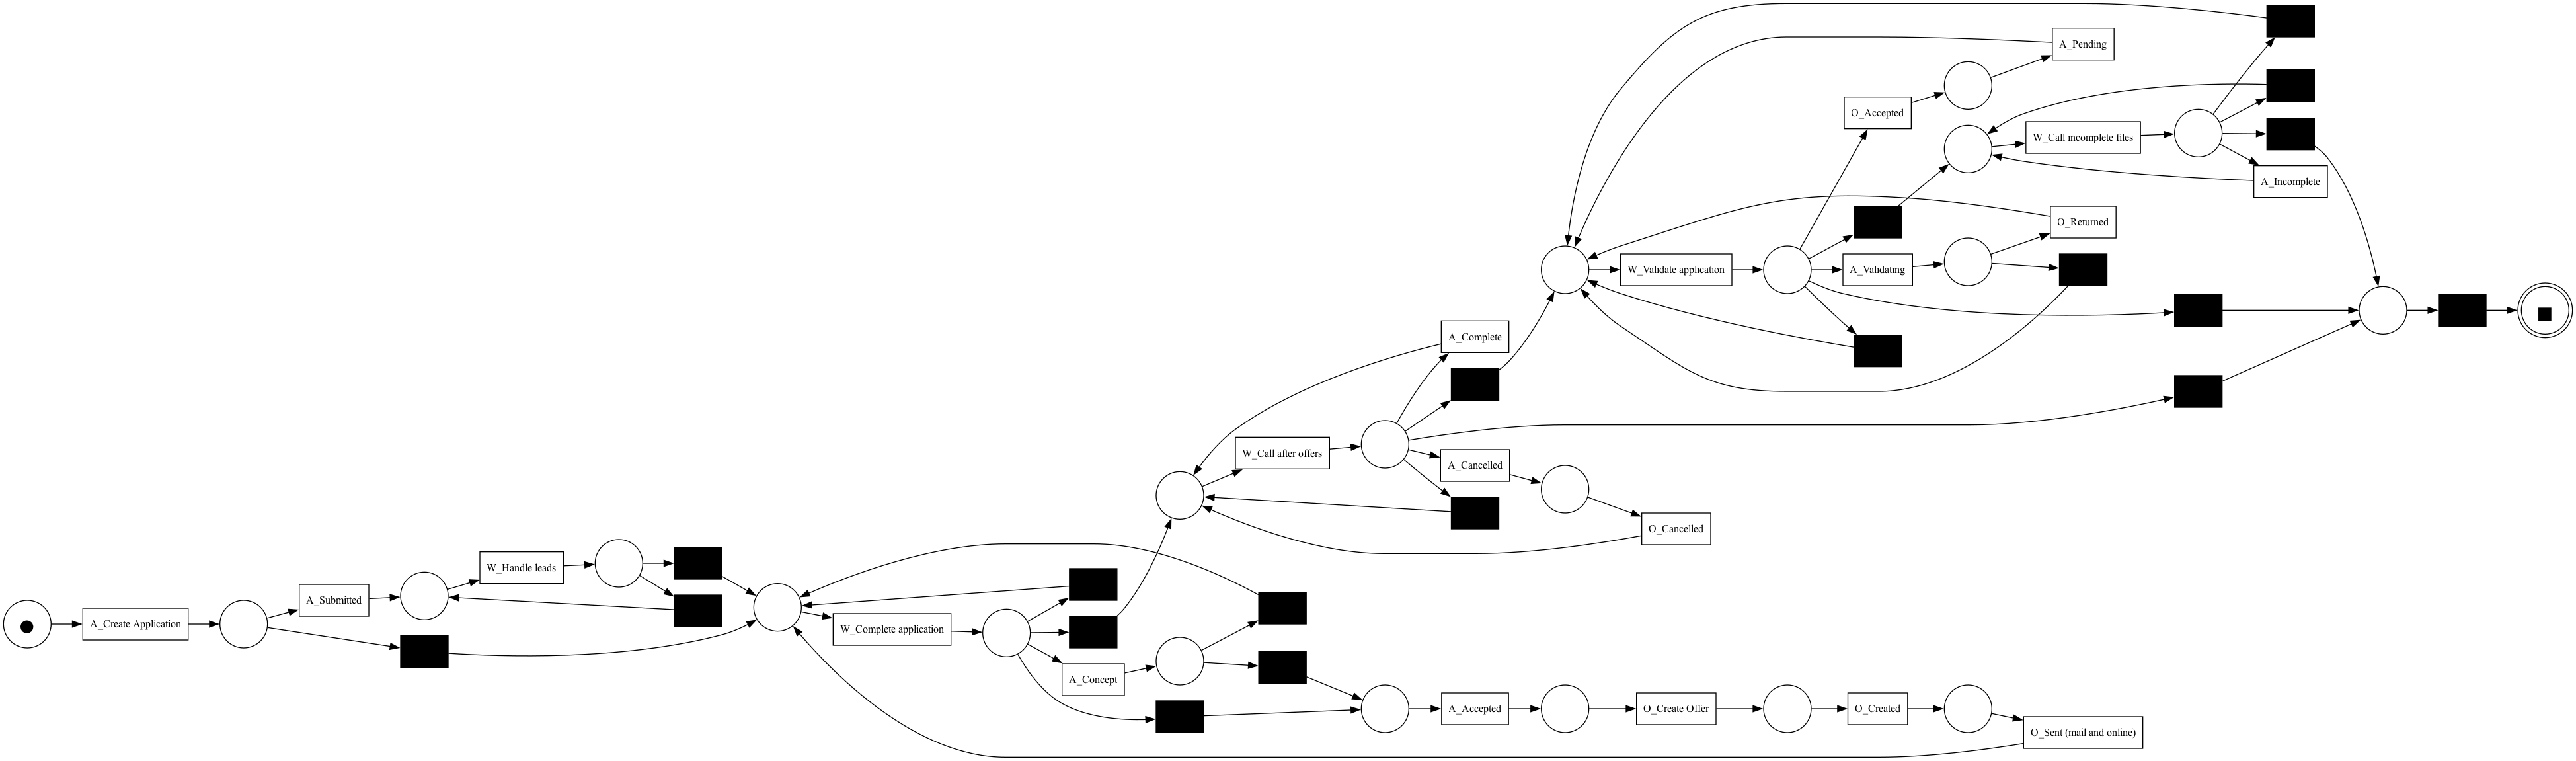

In [19]:
# ___________ FINAL MODEL ____________
bpmn_model = bpmn_importer.apply("./final_Model/5_self-loops.bpmn")

net_intermediate, im_intermediate, fm_intermediate = bpmn_to_petri.apply(bpmn_model)

# Visualize the discovered Petri net
pm4py.view_petri_net(net_intermediate, im_intermediate, fm_intermediate)

In [19]:
print("=== QUALITY METRICS: Intermediate model (5 self-loops) ===")

fitness_final = pm4py.fitness_alignments(df_filtered, net_intermediate, im_intermediate, fm_intermediate, multi_processing=True)
print("Fitness (trace):", round(fitness_final["average_trace_fitness"], 3))

precision_final = pm4py.precision_alignments(df_filtered, net_intermediate, im_intermediate, fm_intermediate, multi_processing=True)
print("Precision:", round(precision_final, 3))

generalization_final = generalization_evaluator.apply(df_filtered, net_intermediate, im_intermediate, fm_intermediate)
print("Generalization:", round(generalization_final, 3))

simplicity_final = simplicity_evaluator.apply(net_intermediate)
print("Simplicity:", round(simplicity_final, 3))

=== QUALITY METRICS: Intermediate model (5 self-loops) ===


aligning log, completed variants ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 0.943


computing precision with alignments, completed variants ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.557


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.994
Simplicity: 0.642


# Final Model 

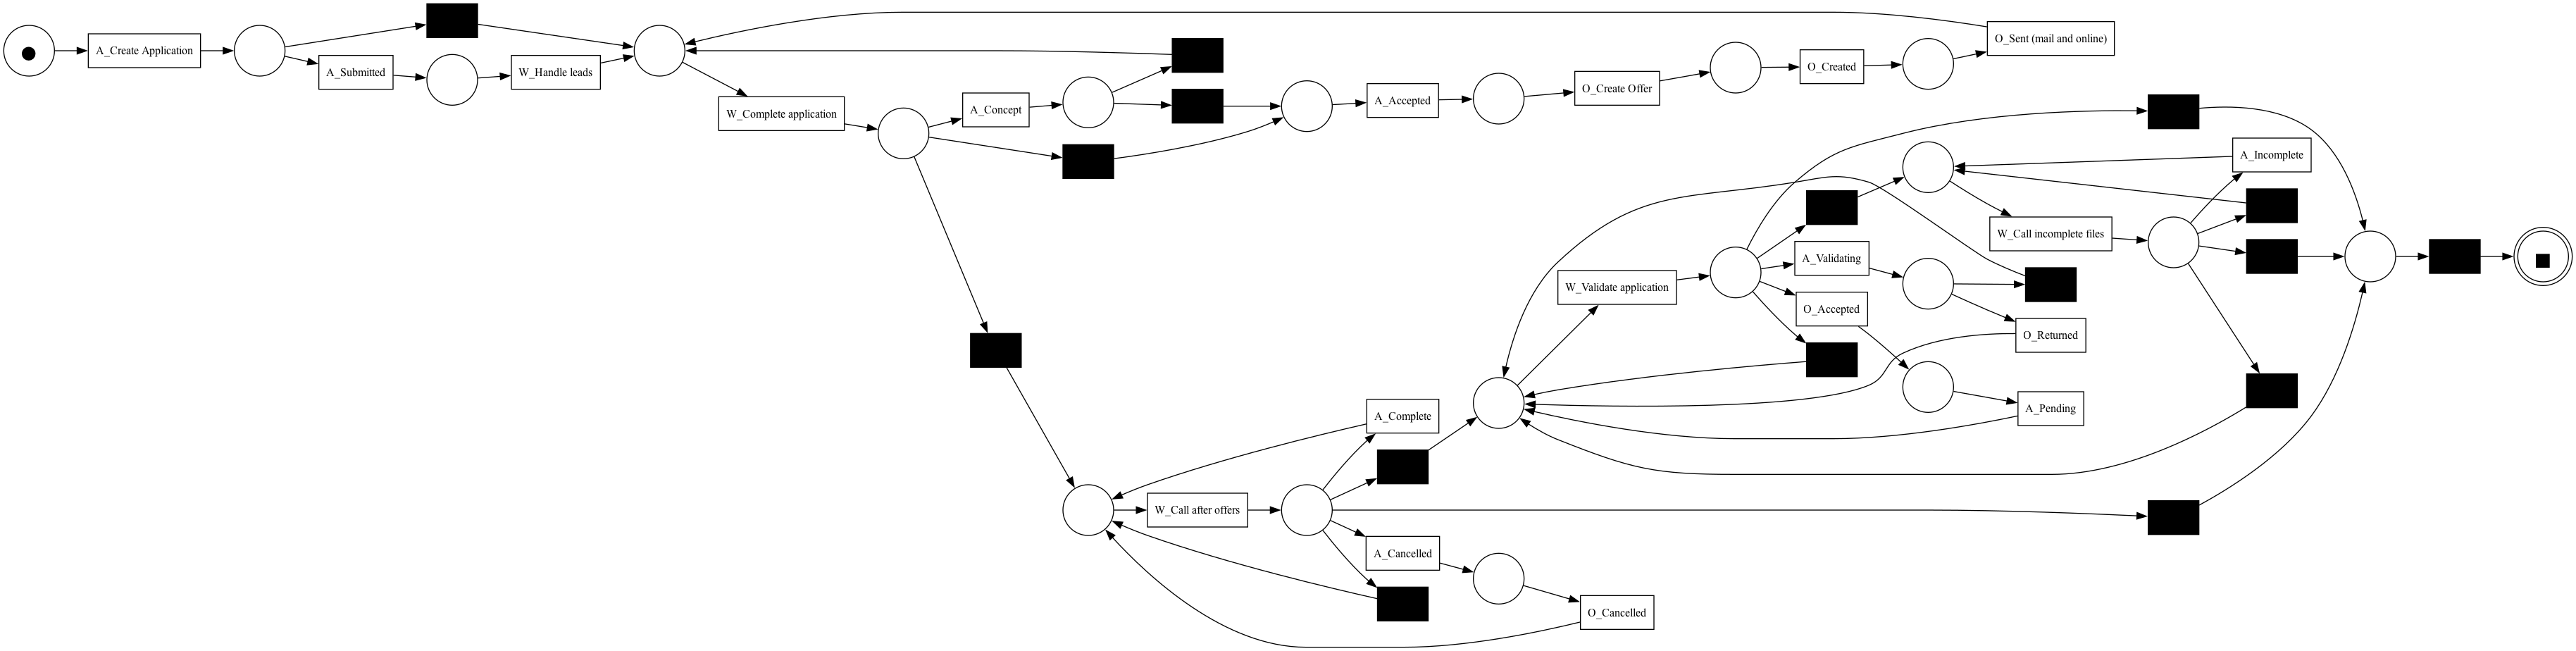

In [20]:
# ___________ FINAL MODEL ____________
bpmn_model = bpmn_importer.apply("./final_Model/final_model.bpmn")

net_final, im_final, fm_final = bpmn_to_petri.apply(bpmn_model)

# Visualize the discovered Petri net
pm4py.view_petri_net(net_final, im_final, fm_final)

In [5]:
print("=== QUALITY METRICS: FINAL MODEL ===")

fitness_final = pm4py.fitness_alignments(df_filtered, net_final, im_final, fm_final, multi_processing=True)
print("Fitness (trace):", round(fitness_final["average_trace_fitness"], 3))
print("Fitness (log):", round(fitness_final["log_fitness"], 3))

precision_final = pm4py.precision_alignments(df_filtered, net_final, im_final, fm_final, multi_processing=True)
print("Precision:", round(precision_final, 3))

generalization_final = generalization_evaluator.apply(df_filtered, net_final, im_final, fm_final)
print("Generalization:", round(generalization_final, 3))

simplicity_final = simplicity_evaluator.apply(net_final)
print("Simplicity:", round(simplicity_final, 3))

=== QUALITY METRICS: FINAL MODEL ===


aligning log, completed variants ::   0%|          | 0/15844 [00:00<?, ?it/s]

Fitness (trace): 0.87
Fitness (log): 0.87


computing precision with alignments, completed variants ::   0%|          | 0/263029 [00:00<?, ?it/s]

Precision: 0.725


replaying log with TBR, completed traces ::   0%|          | 0/15844 [00:00<?, ?it/s]

Generalization: 0.993
Simplicity: 0.655


# Simplicity Metrics

The following code computes structural simplicity metrics (size, connectivity, density, average node degree) for Petri nets.  
Definitions for these metrics are taken from:  
Josep Carmona, Boudewijn F. van Dongen, Andreas Solti, and Matthias Weidlich. Conformance Checking — Relating Processes and Models. Springer, 2018.

In [21]:
# ___________ Simplicity Metrics  ____________
def simplicity_metrics(net):
    places = list(net.places)
    transitions = list(net.transitions)
    arcs = list(net.arcs)

    num_places = len(places)
    num_transitions = len(transitions)
    num_nodes = num_places + num_transitions
    num_arcs = len(arcs)

    # Size
    size = num_nodes + num_arcs

    # Coeﬃcient of Connectivity = arcs / nodes
    connectivity = round(num_arcs / num_nodes, 2) if num_nodes > 0 else 0.0

    # Density = arcs / (nodes * (nodes - 1))
    max_arcs = num_nodes * (num_nodes - 1)
    density = round(num_arcs / max_arcs, 2) if max_arcs > 0 else 0.0


    return {
        "Size": size,
        "Connectivity": connectivity,
        "Density": density,
    }
    
print("\n=== CUSTOM SIMPLICITY METRICS ===")
print("Alpha Miner:", simplicity_metrics(net_alpha))
print("Inductive Miner:", simplicity_metrics(net_ind))
print("Heuristics Miner:", simplicity_metrics(net_heur))
print("Refined Base Model:", simplicity_metrics(net_base))
print("Intermediate Model (5 self-loops):", simplicity_metrics(net_intermediate))
print("Final Model:", simplicity_metrics(net_final))


=== CUSTOM SIMPLICITY METRICS ===
Alpha Miner: {'Size': 90, 'Connectivity': 1.37, 'Density': 0.04}
Inductive Miner: {'Size': 340, 'Connectivity': 1.3, 'Density': 0.01}
Heuristics Miner: {'Size': 295, 'Connectivity': 1.46, 'Density': 0.01}
Refined Base Model: {'Size': 120, 'Connectivity': 1.22, 'Density': 0.02}
Intermediate Model (5 self-loops): {'Size': 139, 'Connectivity': 1.28, 'Density': 0.02}
Final Model: {'Size': 129, 'Connectivity': 1.26, 'Density': 0.02}
